<a href="https://colab.research.google.com/github/omprakash0224/MNIST-Handwritten-Digit-Recognition/blob/main/MNIST_Handwritten_Digit_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup & Imports**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


**Load MNIST Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


**Data Preprocessing**


*   Normalize pixel values (0–255 → 0–1)
*   Adding channel dimension for CNN

In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("After reshape:", x_train.shape)


After reshape: (60000, 28, 28, 1)


**Visualize Sample Images**

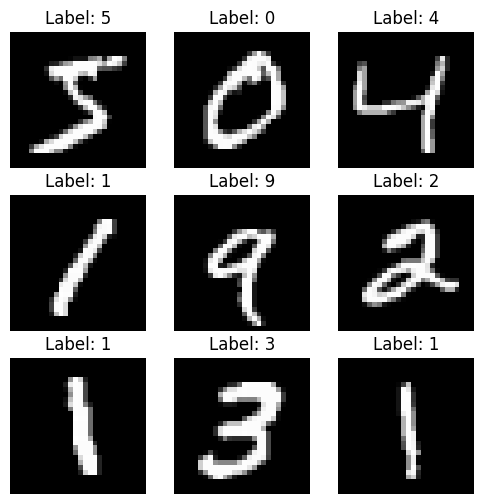

In [4]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


**Build CNN Model**

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile Model**

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [7]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 106ms/step - accuracy: 0.8042 - loss: 0.6364 - val_accuracy: 0.9832 - val_loss: 0.0551
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9718 - loss: 0.0965 - val_accuracy: 0.9883 - val_loss: 0.0416
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9792 - loss: 0.0663 - val_accuracy: 0.9902 - val_loss: 0.0320
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.9841 - loss: 0.0533 - val_accuracy: 0.9910 - val_loss: 0.0301
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.9870 - loss: 0.0426 - val_accuracy: 0.9918 - val_loss: 0.0289
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 108ms/step - accuracy: 0.9876 - loss: 0.0403 - val_accuracy: 0.9913 - val_loss: 0.0290
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9920 - val_loss: 0.0256
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9904 - loss: 0

**Evaluate on Test Data**

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9907 - loss: 0.0297
Test Accuracy: 0.9927999973297119


**Plot Training Accuracy & Loss**

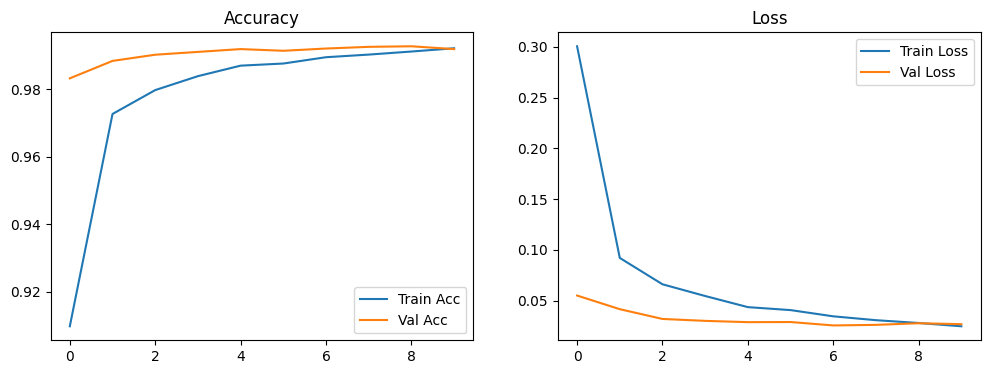

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


**Making Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


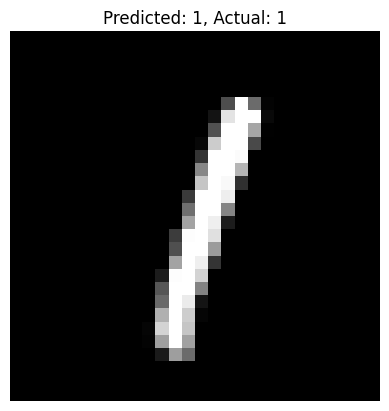

In [10]:
predictions = model.predict(x_test)

index = 5
plt.imshow(x_test[index].squeeze(), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.axis('off')
plt.show()


**Save & Load Model**

In [11]:
model.save("mnist_cnn_model.h5")

# Load model
loaded_model = tf.keras.models.load_model("mnist_cnn_model.h5")
